# 035

Named after this: https://www.youtube.com/watch?v=hgZFuq2S15A
        
This code is designed to mimic the way the retina works in identifying parts of images, etc. 

The code is designed entirely to respond to MNIST sized data in order to get the respective neurons working,
it is not designed to learn from this data (at least at this point). MNIST data seemed an appropriate level
of complexity and size to get a small number of neurons working together.

### Setup the environment

In [1]:
import numpy as np
from mnist import MNIST   
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Create a sample image to work with

TODO: Flesh this out into a data pipeline later

In [2]:
mndata = MNIST('./mnist')
images, labels = mndata.load_training()

def get_next_image(index=0):
    return images[index]
    

* Get an image from the training set

In [3]:
image = get_next_image(index=0)
print(mndata.display(image))


............................
............................
............................
............................
............................
.....................@@.....
.............@@@@@@.@@......
........@@@@@@@@@@..........
........@@@@@@..@@..........
...........@@@..............
............@...............
............@...............
.............@..............
.............@@.............
..............@@@...........
................@@..........
.................@@.........
.................@@@........
.................@@@........
..............@@@@@.........
............@@@@@@..........
..........@@@@@.............
........@@@@@...............
......@@@@@@................
.....@@@@...................
............................
............................
............................


* Convert to a numpy array so we can process it easier / better

In [4]:
image=np.asarray(image).reshape((28,28))
print(image)
print(image.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Convolve the image...

* Step across the image, creating a series of mini-matrices that can be used to feed into the retinal neurons

In [7]:
stride = (4,2)   # This will be 4 on-centre neurons, 2 surround (off-centre) neurons
stride_size = stride[0] + stride[1]
len_x, len_y = image.shape
#x_max = int((len_x - stride_size)/stride[0])+1
#y_max = int((len_y - stride_size)/stride[0])+1
x_max = int(len_x/stride[0])
y_max = int(len_y/stride[0])
print ('Convolution Dimensions: x={} / y={}'.format(x_max, y_max))  #', starting at x={}, y={}'.format(x_max, y_max, x_count, y_count))

Convolution Dimensions: x=7 / y=7


* Normalise the image

In [8]:
image_norm = (image * 255.0/image.max()) / 255.
print(image_norm)

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.        

* Render the image in each of it's retinal 'zones'

This will be the basis of what each retinal unit views as we progress

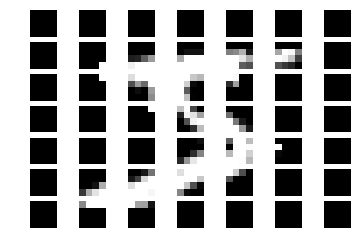

In [31]:
fig = plt.figure() #int(x_max+1) * int(y_max+1))
x_count, y_count = 1, 1

#for y in range (0, len_y - stride_size, stride[0]):
for y in range (0, len_y, stride[0]):
    x_count = 1
    #for x in range(0, len_x - stride_size, stride[0]):
    for x in range(0, len_x, stride[0]):
        #print ('Rendering kernel {}/{} at plot {}/{}/{}'.format(x, y, x_count, y_count, (y_count-1)*x_max+x_count))

        x_end = x + stride[0]
        y_end = y + stride[0]
        kernel = image_norm[y:y_end, x:x_end]
        #orientation = s1(kernel)
        a = fig.add_subplot(y_max, x_max, (y_count-1)*x_max+x_count)
        a.axis('off')
        plt.imshow(kernel, cmap="gray")    
        x_count += 1
    y_count += 1
plt.show()    

### Create a basic neuron

Use LIF neuron for now, this can be made more complex over time.

Also this code can be moved out to a seperate function too!!

Based on http://neurdon.wpengine.com/2011/01/19/neural-modeling-with-python-part-1/

In [33]:
# Simulation config (may not all be needed!!)
#T        = 50          # total time to sumulate (msec)
#dt       = 0.125       # simulation time step
#time     = np.arange(0, T+dt, dt) # Time array
#t_rest   = 0           # initial refractory time

In [34]:
#LIF Properties 
#Vm       = np.zeros(len(time)) # potential (V) trace over time
#Rm       = 1                # Resistance (kOhm)
#Cm       = 10               # Capacitance (uF)
#tau_m    = Rm * Cm          # Time constant
#tau_ref  = 4                # refractory period (ms)
#Vth      = 1                # spike threshold
#V_spike  = 0.5              # spike delta (V)

* Function to create spikes for this neuron

Need to pass in the current / pixel brightness here!!

In [60]:
class Neuron():
    def __init__(self):
        # Simulation config (may not all be needed!!)
        self.T        = 50          # total time to sumulate (msec)
        self.dt       = 0.125       # simulation time step
        #self.time     = np.arange(0, T+dt, dt) # Time array
        self.t_rest   = 0           # initial refractory time
        
        #LIF Properties 
        #self.Vm       = np.zeros(len(time)) # potential (V) trace over time
        self.Vm       = 0                # Initial potential (mV)
        self.t        = 0                # Neuron time step
        self.Rm       = 1                # Resistance (kOhm)
        self.Cm       = 10               # Capacitance (uF)
        self.tau_m    = Rm * Cm          # Time constant
        self.tau_ref  = 4                # refractory period (ms)
        self.Vth      = 0.75             # = 1  #spike threshold
        self.V_spike  = 0.5              # spike delta (V)
    
    def spike_generator(self, input, duration):
        time = np.arange(self.t, self.t+duration+dt, dt)
        Vm = np.zeros(len(time)) # potential (V) trace over time
        Vm[0] = self.Vm
        print ('Neuron.spike_generator(input={}, duration={}, Vm={}, t={})'
               .format(input, duration, self.Vm, self.t))
        for i,t in enumerate(time):
            if t > self.t_rest:
                self.Vm = Vm[i-1] + (-Vm[i-1] + input*self.Rm) / self.tau_m * self.dt
                Vm[i] = self.Vm
                if Vm[i] >= self.Vth:
                    Vm[i] += self.V_spike
                    self.t_rest = t + self.tau_ref
        return time, Vm

### Create a retinal unit

Each retinal unit contains

* On-centre cells
* Off-centre / surround cells
* Horizontal cells
* Ganglion cells

Now let's create a function for each type of cell...


* On-center cell

In [61]:
#def on_center_cell(value):

#on_center_cell = Neuron()
#time, Vm = on_center_cell.spike_generator(0)

#print(Vm)


In [62]:
def plot_spikes(time, Vm, x, y):
    plt.plot(time,Vm)
    plt.title('Leaky Integrate and Fire @ {}/{}'.format(x,y))
    plt.ylabel('Membrane potential (V)')
    plt.xlabel('Time (msec)')
    plt.ylim([0,2])
    plt.show()

* Create a matrix of Neurons 

This is working with a single part of the image (currently starting at x=5 and y=5) to simulate the wider solution.  It will create a matrix of neuron classes (stride_x = 6, stride_y = 6) currently 36 neurons in total.

In [63]:
start_x = 5
start_y = 5

In [64]:
neurons=[]
for y in range(start_y, start_y + stride_size, 1):
    neuron_row=[]
    for x in range(start_x, start_x + stride_size, 1):
        #input = image_norm[y,x]
        #print ('Input at {}/{} = {}'.format(x,y,input))
        #on_center_cell = Neuron()
        #time, Vm = on_center_cell.spike_generator(input)
        #plot_spikes(time, Vm, x, y)
        neuron_row.append(Neuron())
    neurons.append(neuron_row)
        

In [65]:
#neurons
len(neurons[0])

6

Input at 5/5 for neuron 0/0 = 0.0
Neuron.spike_generator(input=0.0)


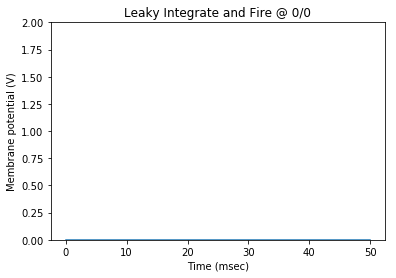

Input at 6/5 for neuron 1/0 = 0.0
Neuron.spike_generator(input=0.0)


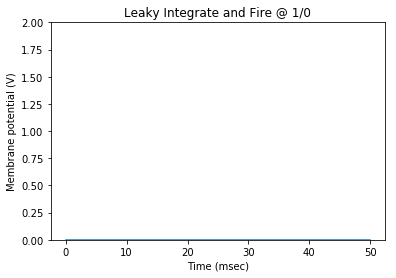

Input at 7/5 for neuron 2/0 = 0.0
Neuron.spike_generator(input=0.0)


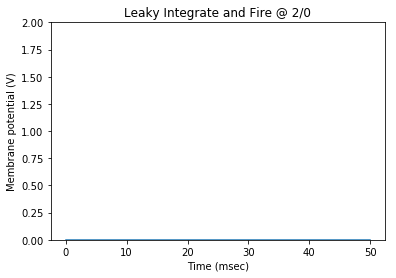

Input at 8/5 for neuron 3/0 = 0.0
Neuron.spike_generator(input=0.0)


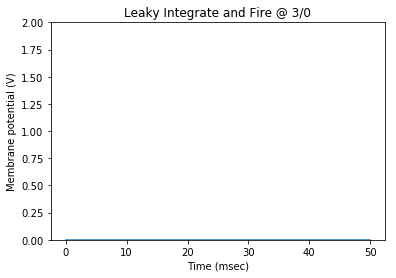

Input at 9/5 for neuron 4/0 = 0.0
Neuron.spike_generator(input=0.0)


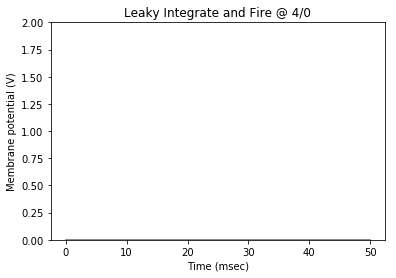

Input at 10/5 for neuron 5/0 = 0.0
Neuron.spike_generator(input=0.0)


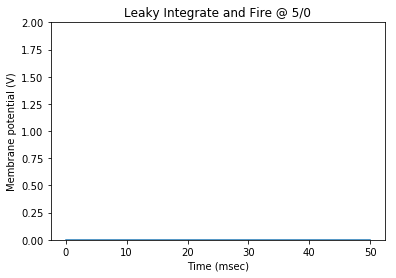

Input at 5/6 for neuron 0/1 = 0.0
Neuron.spike_generator(input=0.0)


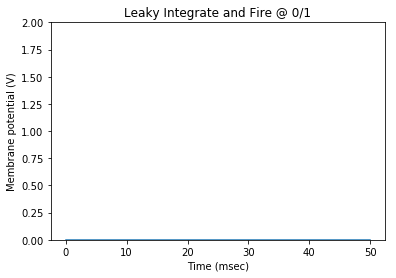

Input at 6/6 for neuron 1/1 = 0.0
Neuron.spike_generator(input=0.0)


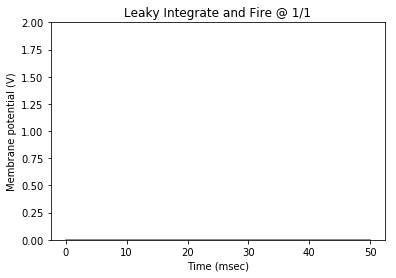

Input at 7/6 for neuron 2/1 = 0.0
Neuron.spike_generator(input=0.0)


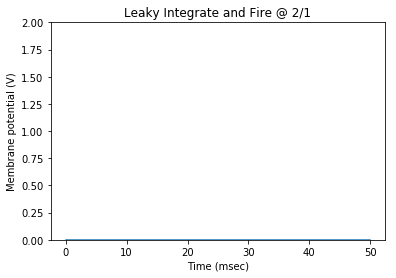

Input at 8/6 for neuron 3/1 = 0.11764705882352941
Neuron.spike_generator(input=0.11764705882352941)


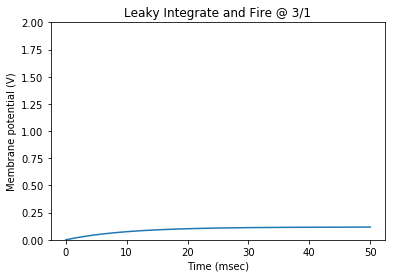

Input at 9/6 for neuron 4/1 = 0.1411764705882353
Neuron.spike_generator(input=0.1411764705882353)


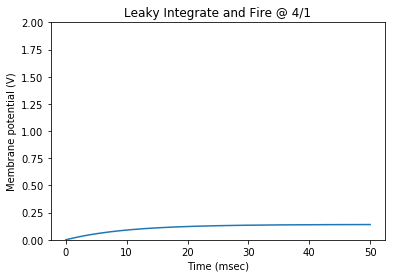

Input at 10/6 for neuron 5/1 = 0.3686274509803922
Neuron.spike_generator(input=0.3686274509803922)


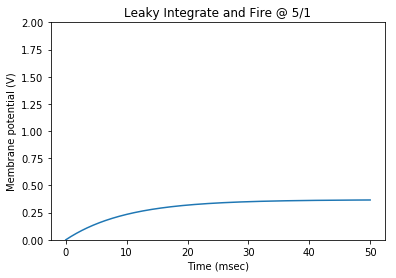

Input at 5/7 for neuron 0/2 = 0.0
Neuron.spike_generator(input=0.0)


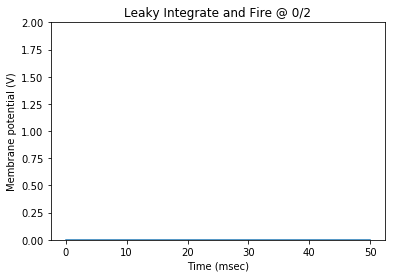

Input at 6/7 for neuron 1/2 = 0.0
Neuron.spike_generator(input=0.0)


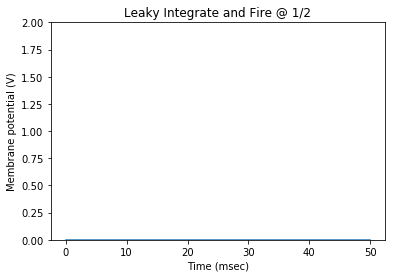

Input at 7/7 for neuron 2/2 = 0.19215686274509805
Neuron.spike_generator(input=0.19215686274509805)


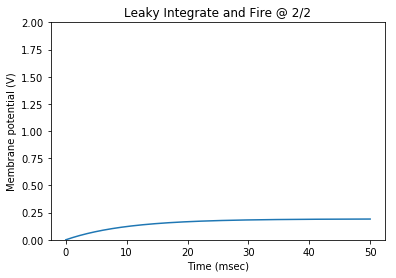

Input at 8/7 for neuron 3/2 = 0.9333333333333333
Neuron.spike_generator(input=0.9333333333333333)


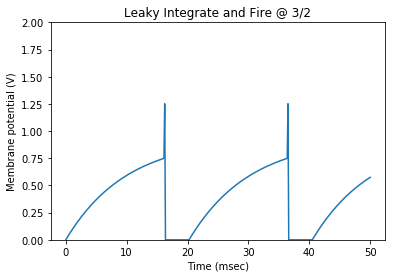

Input at 9/7 for neuron 4/2 = 0.9921568627450981
Neuron.spike_generator(input=0.9921568627450981)


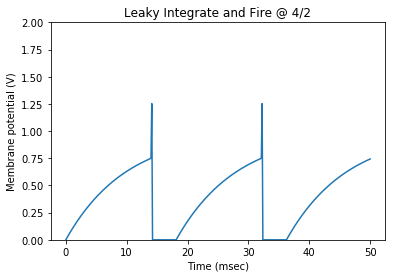

Input at 10/7 for neuron 5/2 = 0.9921568627450981
Neuron.spike_generator(input=0.9921568627450981)


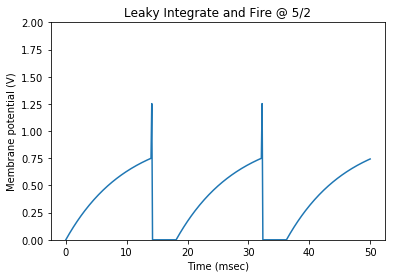

Input at 5/8 for neuron 0/3 = 0.0
Neuron.spike_generator(input=0.0)


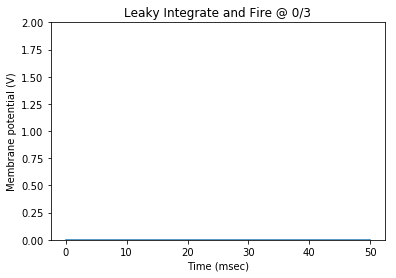

Input at 6/8 for neuron 1/3 = 0.0
Neuron.spike_generator(input=0.0)


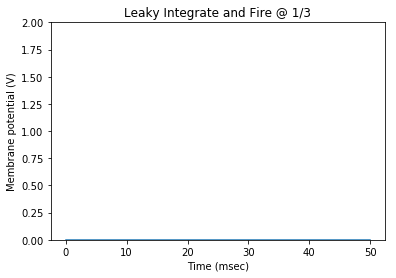

Input at 7/8 for neuron 2/3 = 0.07058823529411765
Neuron.spike_generator(input=0.07058823529411765)


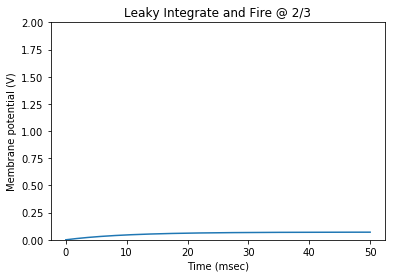

Input at 8/8 for neuron 3/3 = 0.8588235294117647
Neuron.spike_generator(input=0.8588235294117647)


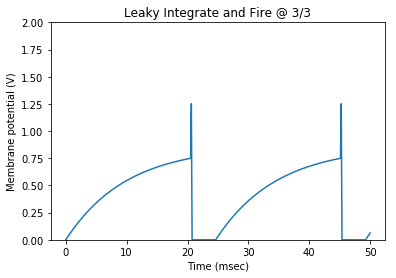

Input at 9/8 for neuron 4/3 = 0.9921568627450981
Neuron.spike_generator(input=0.9921568627450981)


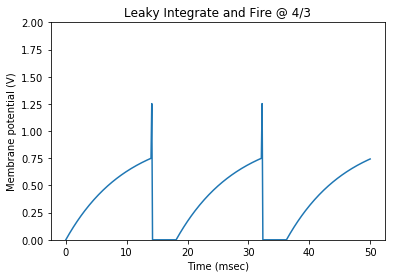

Input at 10/8 for neuron 5/3 = 0.9921568627450981
Neuron.spike_generator(input=0.9921568627450981)


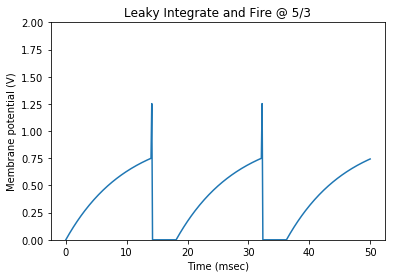

Input at 5/9 for neuron 0/4 = 0.0
Neuron.spike_generator(input=0.0)


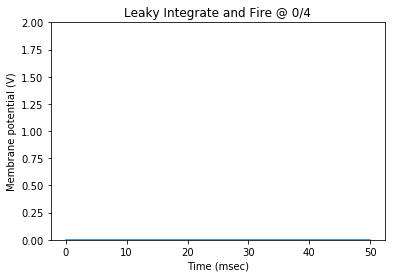

Input at 6/9 for neuron 1/4 = 0.0
Neuron.spike_generator(input=0.0)


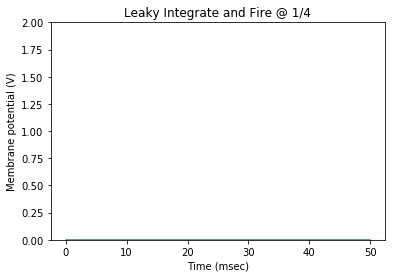

Input at 7/9 for neuron 2/4 = 0.0
Neuron.spike_generator(input=0.0)


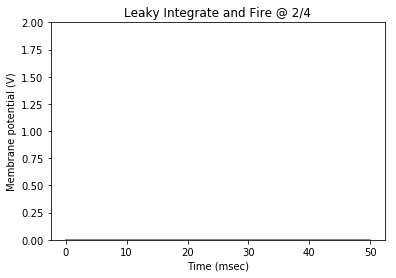

Input at 8/9 for neuron 3/4 = 0.3137254901960784
Neuron.spike_generator(input=0.3137254901960784)


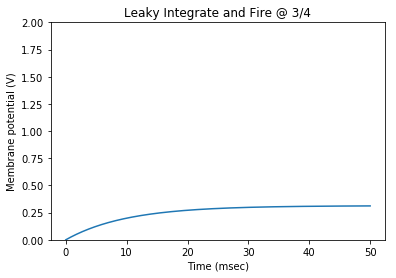

Input at 9/9 for neuron 4/4 = 0.611764705882353
Neuron.spike_generator(input=0.611764705882353)


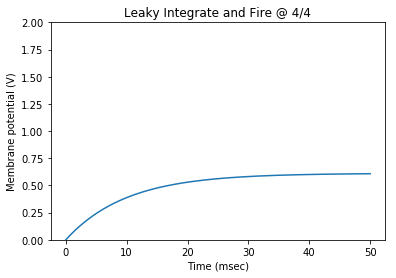

Input at 10/9 for neuron 5/4 = 0.4196078431372549
Neuron.spike_generator(input=0.4196078431372549)


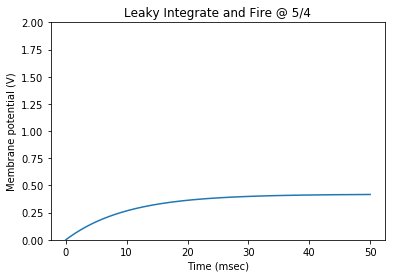

Input at 5/10 for neuron 0/5 = 0.0
Neuron.spike_generator(input=0.0)


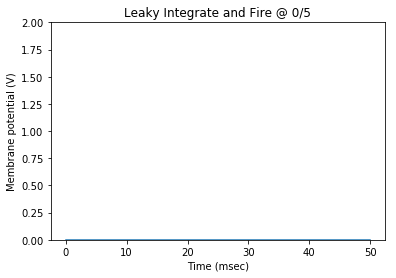

Input at 6/10 for neuron 1/5 = 0.0
Neuron.spike_generator(input=0.0)


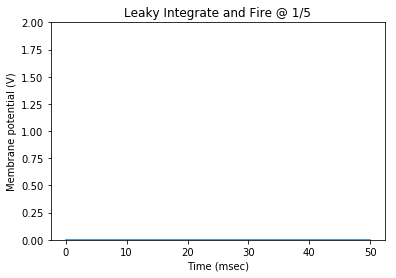

Input at 7/10 for neuron 2/5 = 0.0
Neuron.spike_generator(input=0.0)


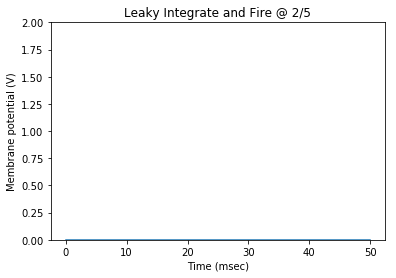

Input at 8/10 for neuron 3/5 = 0.0
Neuron.spike_generator(input=0.0)


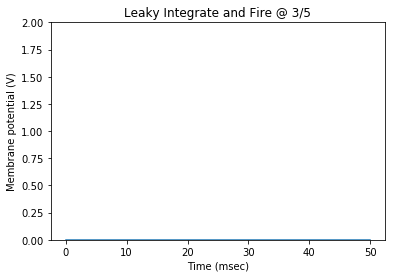

Input at 9/10 for neuron 4/5 = 0.054901960784313725
Neuron.spike_generator(input=0.054901960784313725)


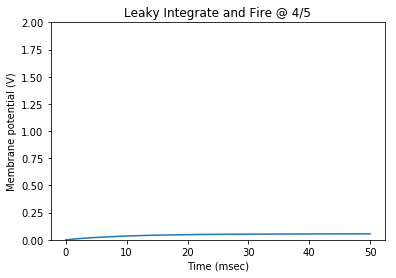

Input at 10/10 for neuron 5/5 = 0.00392156862745098
Neuron.spike_generator(input=0.00392156862745098)


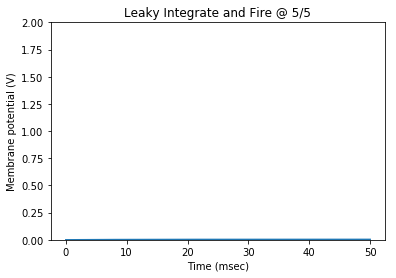

In [66]:
for y in range(start_y, start_y + stride_size, 1):
    for x in range(start_x, start_x + stride_size, 1):
        input = image_norm[y,x]
        neuron_x = x-start_x
        neuron_y = y-start_y
        print ('Input at {}/{} for neuron {}/{} = {}'.format(x, y, neuron_x,neuron_y,input))
        time, Vm = neurons[neuron_x][neuron_y].spike_generator(input)
        plot_spikes(time, Vm, neuron_x, neuron_y)

Input at 5/5 for neuron 0/0 = 0.0
Neuron.spike_generator(input=0)


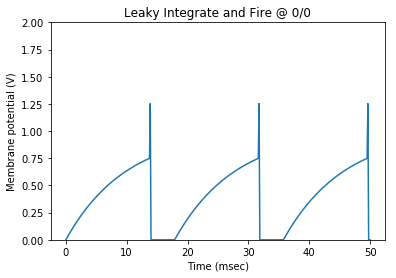

In [73]:
x, y = 5, 5
input = image_norm[y,x]
neuron_x = x-start_x
neuron_y = y-start_y
print ('Input at {}/{} for neuron {}/{} = {}'.format(x, y, neuron_x,neuron_y,input))
time, Vm = neurons[neuron_x][neuron_y].spike_generator(0)
plot_spikes(time, Vm, neuron_x, neuron_y)

Input at 6/6 for neuron 1/1 = 0.0
Neuron.spike_generator(input=0)


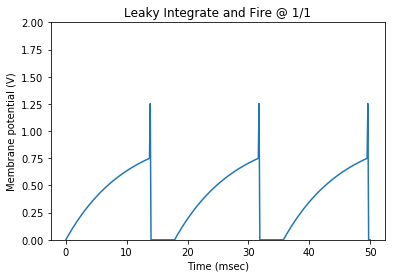

In [70]:
x, y = 6, 6
input = image_norm[y,x]
neuron_x = x-start_x
neuron_y = y-start_y
print ('Input at {}/{} for neuron {}/{} = {}'.format(x, y, neuron_x,neuron_y,input))
time, Vm = neurons[neuron_x][neuron_y].spike_generator(0)
plot_spikes(time, Vm, neuron_x, neuron_y)